# Rotation curves notebook

You have just been introduced to the idea of rotation curves of galaxies and the questions that arise from these measurements. This task will allow you to compare real observational data to theoretical models of what galaxies are made of. 

For this task you will need to draw on all the skills and physics you have learnt so far. 


## Task 1

You have a file that contains the orbital velocities of stars in a galaxy and their radial distance from the centre of the galaxy. You will need use this data to construct the *rotation curve* of the galaxy. 

You should use the data file *rc100224.dat*

The first column of the file contains the radius (kpc: kiloparsec) and the second column contains observed orbital velocity ($km/s$).

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
rcdata = np.loadtxt('rc100224.dat',skiprows=1)

In [3]:
rcdata = np.array(rcdata)
radius = rcdata[:,0]
orbvel = rcdata[:,1]

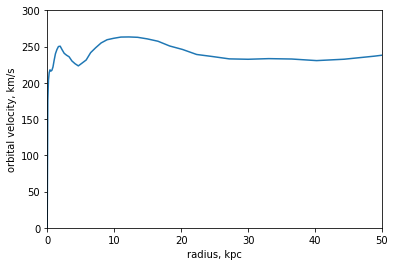

In [11]:
plt.plot(radius,orbvel)
#plt.xscale('log')
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.show()

## Task 2

For this task you will use a real mass distribution data from a model of the Andromeda galaxy (M31) to calculate the orbital velocities. The mass distribution is of *only baryonic matter* (stars and gas). You will use the mass distribution to calculate and plot the rotation curve of the galaxy.

From the data file, remember that you need to use the *cumulative/enclosed mass*.

You can then use *Kepler's Laws of Planetary Motion* (see day one lecture slides) to calculate the orbital velocities of stars as a function of radial distance and plot this as a line graph.  

You should then compare your graph to the one you made in task one and comment on any differences you find.


You should use the data file *M31_mass2.dat*

The first column of the file contains the radius (pc) and the second column contains the mass at that radius. 


In [5]:
def orbVel(r,mass):
    G=4.30091e-6
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G*mass[i+1]/r[i+1])
        vel.append(tempv)
    return vel

In [6]:
M31data = np.loadtxt('M31_mass2.dat',skiprows=1)
M31data = np.array(M31data)
M31radius = M31data[:,0]/1000
M31mass = M31data[:,1]

M31vel = orbVel(M31radius, M31mass)

Text(0.5,0,'radius, kpc')

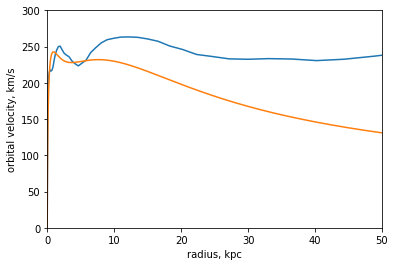

In [7]:
plt.plot(radius,orbvel)
plt.plot(M31radius,M31vel)

plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')

## Task 3a

We will now modify our model from task two and see how this affects the rotation curve. To modify our model we will add a *non-baryonic component* to the mass distribution in the form of a dark matter mass profile.

For this task, you will first define a *density profile*. You will have to calculate the mass distribution in part b from this density profile. This is done by first making a density profile using the radii values in the previous data files and then using a forward Euler solver function to get the mass function.

Then, add the dark matter mass to the mass distribution in task two. After adding the mass, you should plot the rotation curve of the new mass distribution.

The density profile follows the NFW-profile (see lecture slides for more information).

For the constants, use: $\rho_c = 2.1 \times 10^3, r_c = 16.5 \times 10^3$
For initial conditions, use $\rho(r)\rvert_{r = 0} = \rho_c$


In [8]:
def rhoCal(r):
#     r = np.array(r)
    rhozero = 2.1e3
    scaleradius = 16.5e3
#     rhozero = 2.0e+7
#     scaleradius = 14.5e2
    rhoOut = [rhozero]
    for i in range(len(r)-1):
        temprho = rhozero / ((r[i+1]/scaleradius)*(1 + r[i+1]/scaleradius)**2)
        rhoOut.append(temprho)
    return rhoOut


## Task 3b
This part of the task is to calculate the dark matter mass profile and add it to mass distribution in task two. After adding the mass, you should plot the rotation curve of the new mass distribution.

Recall that: 

$M(r)= \int 4  \pi r^2 \rho(r) dr$,  from which it follows that:

$M'(r) = \dfrac{dM(r)}{dr} = 4 \pi r^2 \rho(r)$,    which means $M_{n+1} = M_n + h \left( 4 \pi r_n^2 \rho_n  \right)$

And remember that you need to use the enclosed mass -- **not** the mass at point $r$.

For initial conditions, use $M(0) = 0$. Use $h = r_{n+1} - r_n$ and $r$ to be the M31 radius data.

In [12]:
def DM(r, rho):
    dmmass = [0]
    for i in range(len(r)-1):
        h = (r[i+1]-r[i])
        mTemp = 4*np.pi*r[i]**2*rho[i]*h
        mTemp2 = dmmass[i] + mTemp
        dmmass.append(mTemp2)
    return dmmass

dmRho = rhoCal(M31radius)
# testR = np.arange(0., 60*1e3,1.)
# dmRho = rho(testR)
print(max(dmRho))
dmMass = DM(M31radius, dmRho)
print(max(dmMass))

34649995800.000374
779941046075.6361


979797285156.9661


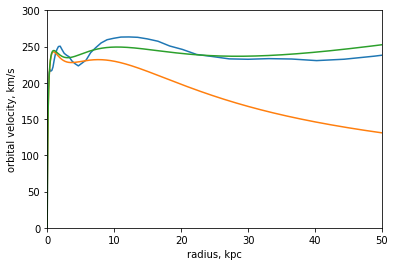

In [13]:
dmRho = rhoCal(M31radius)
dmMass = DM(M31radius, dmRho)
DMandBaryonic = np.array(dmMass) + np.array(M31mass)
print(max(DMandBaryonic))

DMvel = orbVel(M31radius,DMandBaryonic)

plt.plot(radius,orbvel)
plt.plot(M31radius,M31vel)
plt.plot(M31radius,DMvel)
# plt.plot(M31radius,M31vel)
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.savefig('obs_bary_DM.png')